In [63]:
import pandas as pd
import numpy as np

In [64]:
keyboards = pd.read_csv('../inputCSVs/keyboards.csv')

In [65]:
keyboards.shape

(33613, 4)

In [66]:
# Check the missing values in df
null_values=keyboards.isna().sum()


In [67]:
null_values

Unnamed: 0    0
product_Id    0
rating        0
reviews       0
dtype: int64

In [68]:
keyboards.shape

(33613, 4)

In [69]:
!pip3 install gensim
!pip3 install pyldavis
!pip3 install nltk
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install textblob
!pip3 install spacy
!python3 -m spacy download en 

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [70]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samridhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
pd.set_option("display.max_colwidth", 200)
import re
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
%matplotlib inline

In [72]:
# a function that provides the most frequent words with count on a plot
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  print(d)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [73]:
keyboards['reviews']

0        I looked at this keyboard in a store and discoverd that while it is called `` ergonomic '' , it is flat .It does n't curve up in the middle like ergonomic keyboards from Microsoft and Logitech .Yo...
1        I picked this keyboard at random -LRB- mostly because it 's inexpensive -RRB- when I first decided to buy one due to tendinitis issues .I think it 's great as far as comfort and ease of use -LRB- ...
2        I had an older EZ-Key ergo keyboard that finally quit on me .After looking around I found that the Belkin keyboard was similar enough that I 'm wondering if it is licensed - I know EZ-Key does OEM...
3        This is one of the few keyboards that actually puts the ' 6 ' key on the correct side of the split for touch typing .It has Great response , the keys work quickly .You can use a key combination ot...
4        I have this keyboard in black at the office and in white at home .It 's comfortable and the 6 key is in the proper place .Do n't presume that because it 's

         word   count
25        the  198620
18          ,  152734
6           a  111760
60         to  111131
8         and  105337
12         it   98731
0           I   97723
4    keyboard   81938
13         is   74198
72         of   55155
46        for   52017
3        this   50973
10       that   44100
66         .I   41458
36         on   40803
250      with   40558
48          .   40426
251        my   39902
5          in   33876
155      have   33816
105       you   32903
42        but   30640
94       keys   30229
45        not   29199
22        n't   28325
80       .The   26469
99        was   25710
54         's   23018
160       are   22775
43         as   22699


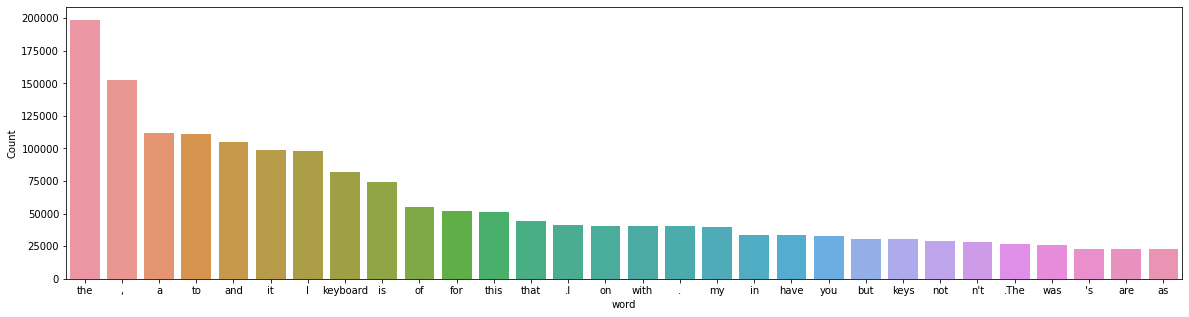

In [74]:
freq_words(keyboards['reviews'])

In [75]:
# replace "n't" with " not"
keyboards['reviews']= keyboards['reviews'].str.replace("n\'t", " not")

# remove unwanted characters, numbers and symbols
keyboards['reviews'] = keyboards['reviews'].str.replace("[^a-zA-Z#]", " ")

/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1804/3798615021.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  keyboards['reviews'] = keyboards['reviews'].str.replace("[^a-zA-Z#]", " ")


In [76]:
keyboards['reviews']

0        I looked at this keyboard in a store and discoverd that while it is called    ergonomic      it is flat  It does  not curve up in the middle like ergonomic keyboards from Microsoft and Logitech  Y...
1        I picked this keyboard at random  LRB  mostly because it  s inexpensive  RRB  when I first decided to buy one due to tendinitis issues  I think it  s great as far as comfort and ease of use  LRB  ...
2        I had an older EZ Key ergo keyboard that finally quit on me  After looking around I found that the Belkin keyboard was similar enough that I  m wondering if it is licensed   I know EZ Key does OEM...
3        This is one of the few keyboards that actually puts the       key on the correct side of the split for touch typing  It has Great response   the keys work quickly  You can use a key combination ot...
4        I have this keyboard in black at the office and in white at home  It  s comfortable and the   key is in the proper place  Do  not presume that because it  

         word   count
22        the  198763
0           I  142433
6           a  111861
55         to  111349
8         and  105646
12         it   98789
4    keyboard   82664
13         is   74210
19        not   57565
66         of   55260
42        for   52032
3        this   50982
10       that   44106
33         on   41891
233      with   40568
234        my   39912
5          in   34570
145      have   33848
96        you   32921
74        The   32213
39        but   30650
86       keys   30491
91        was   25720
49          s   23553
150       are   22779
40         as   22729
51        RRB   21293
17         It   20680
46        LRB   19836
67        use   19231


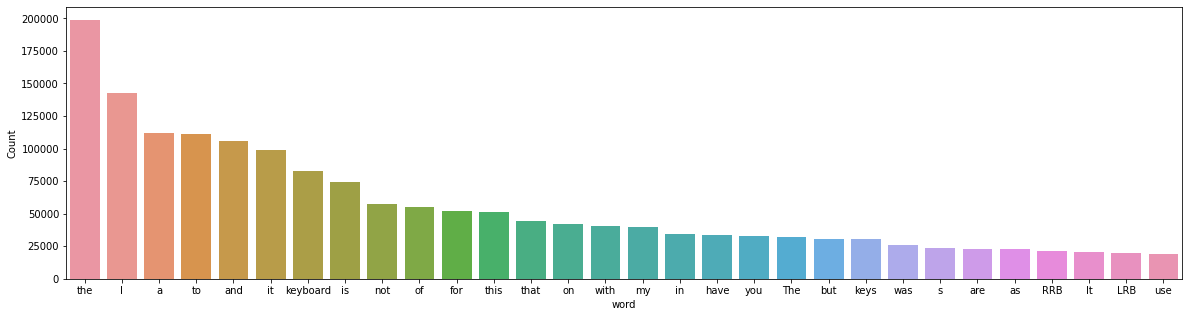

In [77]:
freq_words(keyboards['reviews'])

#### Checking stopwords in the reviews

In [78]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [79]:
# Checking the number of stopwords in each review
keyboards['stopwords'] = keyboards['reviews'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
keyboards[['reviews','stopwords']].head()

,reviews,stopwords
0,I looked at this keyboard in a store and discoverd that while it is called ergonomic it is flat It does not curve up in the middle like ergonomic keyboards from Microsoft and Logitech Y...,33
1,I picked this keyboard at random LRB mostly because it s inexpensive RRB when I first decided to buy one due to tendinitis issues I think it s great as far as comfort and ease of use LRB ...,68
2,I had an older EZ Key ergo keyboard that finally quit on me After looking around I found that the Belkin keyboard was similar enough that I m wondering if it is licensed I know EZ Key does OEM...,203
3,This is one of the few keyboards that actually puts the key on the correct side of the split for touch typing It has Great response the keys work quickly You can use a key combination ot...,19
4,I have this keyboard in black at the office and in white at home It s comfortable and the key is in the proper place Do not presume that because it s a cheap price that it is not worth it ...,30


In [80]:
# function to remove stopwords
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new

In [81]:
keyboards['reviews']

0        I looked at this keyboard in a store and discoverd that while it is called    ergonomic      it is flat  It does  not curve up in the middle like ergonomic keyboards from Microsoft and Logitech  Y...
1        I picked this keyboard at random  LRB  mostly because it  s inexpensive  RRB  when I first decided to buy one due to tendinitis issues  I think it  s great as far as comfort and ease of use  LRB  ...
2        I had an older EZ Key ergo keyboard that finally quit on me  After looking around I found that the Belkin keyboard was similar enough that I  m wondering if it is licensed   I know EZ Key does OEM...
3        This is one of the few keyboards that actually puts the       key on the correct side of the split for touch typing  It has Great response   the keys work quickly  You can use a key combination ot...
4        I have this keyboard in black at the office and in white at home  It  s comfortable and the   key is in the proper place  Do  not presume that because it  

#### Checking punctuation present in the reviews

In [82]:
import string
nltk.download('punkt')
def count_punctuation(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

keyboards['punctuation'] = keyboards['reviews'].apply(lambda x: count_punctuation(x))


[nltk_data] Downloading package punkt to /Users/samridhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [83]:
keyboards[['reviews','punctuation']]

,reviews,punctuation
0,I looked at this keyboard in a store and discoverd that while it is called ergonomic it is flat It does not curve up in the middle like ergonomic keyboards from Microsoft and Logitech Y...,0
1,I picked this keyboard at random LRB mostly because it s inexpensive RRB when I first decided to buy one due to tendinitis issues I think it s great as far as comfort and ease of use LRB ...,0
2,I had an older EZ Key ergo keyboard that finally quit on me After looking around I found that the Belkin keyboard was similar enough that I m wondering if it is licensed I know EZ Key does OEM...,0
3,This is one of the few keyboards that actually puts the key on the correct side of the split for touch typing It has Great response the keys work quickly You can use a key combination ot...,0
4,I have this keyboard in black at the office and in white at home It s comfortable and the key is in the proper place Do not presume that because it s a cheap price that it is not worth it ...,0
...,...,...
33608,It s a great little device especially when you compare the price with others on the market It puts the keyboard at a comfortable level so that my hands and wrists do not tire so fast I d gi...,0
33609,I am still using this product LRB or at least part of it RRB It s easy to install and the keyboard part works well The mouse shelf is pull out plastic sort of fragile wo not function...,0
33610,Received this drawer well packaged and very quickly Installation was straight forward LRB using the template that came with the drawer RRB and because the LRB essential RRB mouse platform...,0
33611,I have an old oak desk that my father rescued from his office before they got new furniture The desk is fantastic except I have to hold my arms too high when I m typing and it was starting to ...,0


#### Checking hastags present in the review text

In [84]:
keyboards['hastags'] = keyboards['reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
keyboards['hastags'].sum()

7035

In [85]:
keyboards.hastags.loc[keyboards.hastags != 0].count()

2319

#### Checking numerics from the reviews

In [86]:
keyboards['numerics'] = keyboards['reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
keyboards['numerics'].sum()

0

#### Checking the words which are in uppercase, which may be significant

In [87]:
keyboards['upper'] = keyboards['reviews'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
keyboards['reviews'][keyboards['upper'] > 1].count()

27303

In [88]:
keyboards['reviews']

0        I looked at this keyboard in a store and discoverd that while it is called    ergonomic      it is flat  It does  not curve up in the middle like ergonomic keyboards from Microsoft and Logitech  Y...
1        I picked this keyboard at random  LRB  mostly because it  s inexpensive  RRB  when I first decided to buy one due to tendinitis issues  I think it  s great as far as comfort and ease of use  LRB  ...
2        I had an older EZ Key ergo keyboard that finally quit on me  After looking around I found that the Belkin keyboard was similar enough that I  m wondering if it is licensed   I know EZ Key does OEM...
3        This is one of the few keyboards that actually puts the       key on the correct side of the split for touch typing  It has Great response   the keys work quickly  You can use a key combination ot...
4        I have this keyboard in black at the office and in white at home  It  s comfortable and the   key is in the proper place  Do  not presume that because it  

#### Cleaning steps

In [89]:


# remove short words whose (length < 3)
keyboards['reviews'] = keyboards['reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# removing puctuations
keyboards['reviews'] = keyboards['reviews'].str.replace('[^\w\s]','')
keyboards['reviews'].head()

# make entire review text lowercase
reviews = [r.lower() for r in keyboards['reviews']]

# remove stopwords from the reviews
reviews = [remove_stopwords(r.split()) for r in reviews]




<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1804/201616340.py:5: DeprecationWarning: invalid escape sequence \w
  keyboards['reviews'] = keyboards['reviews'].str.replace('[^\w\s]','')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1804/201616340.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  keyboards['reviews'] = keyboards['reviews'].str.replace('[^\w\s]','')


In [90]:
keyboards['reviews']

0        looked this keyboard store and discoverd that while called ergonomic flat does not curve the middle like ergonomic keyboards from Microsoft and Logitech You not tell this from the pictures Amazon ...
1        picked this keyboard random LRB mostly because inexpensive RRB when first decided buy one due tendinitis issues think great far comfort and ease use LRB after the normal learning curve going from ...
2        had older Key ergo keyboard that finally quit After looking around found that the Belkin keyboard was similar enough that wondering licensed know Key does OEM stuff what great about this keyboard ...
3        This one the few keyboards that actually puts the key the correct side the split for touch typing has Great response the keys work quickly You can use key combination other that wasd game without ...
4                             have this keyboard black the office and white home comfortable and the key the proper place not presume that because cheap price that 

           word  count
1      keyboard  86307
54         keys  31443
27          rrb  21293
31          one  19874
24          lrb  19836
40          use  19382
58          key  18074
9          like  16866
185       would  14857
36        great  12699
169        work  10831
162        good  10268
268         get   9910
88         well   9709
437       works   9487
239        used   9230
167      typing   9147
10    keyboards   8597
224      really   8535
597        also   8497
536       using   8275
193        type   7993
207        time   7885
1154      mouse   7749
401        back   7539
124        feel   7511
454     product   7355
91         much   7184
56        right   7126
69       little   6974
496        nice   6900
504         usb   6580
12     logitech   6562
62     computer   6183
209    wireless   6157


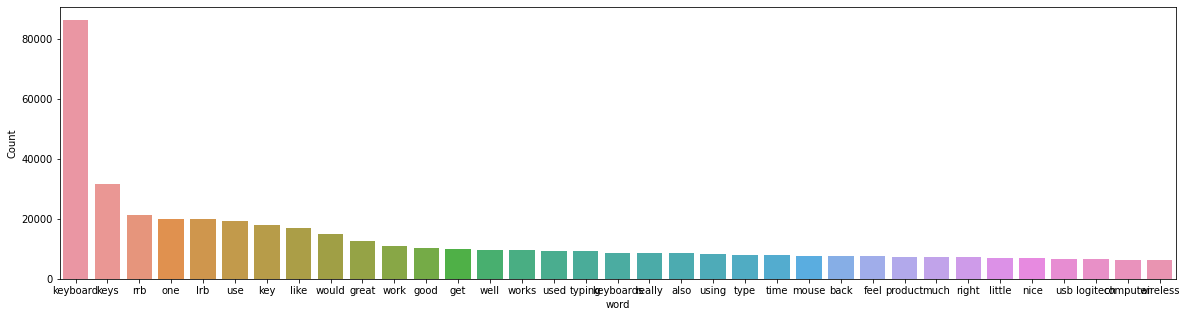

In [91]:
freq_words(reviews, 35)

In [92]:
# !pip3 install -U spacy
# !python3 -m spacy download en 
import spacy
# en_core_web_sm

In [93]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


In [94]:
import pandas as pd
stemmer = SnowballStemmer("english")
# reviews_3 = [stemmer.stem(plural) for plural in original_words]

def stemming_and_lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [95]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['picked', 'keyboard', 'random', 'lrb', 'mostly', 'inexpensive', 'rrb', 'first', 'decided', 'buy', 'one', 'due', 'tendinitis', 'issues', 'think', 'great', 'far', 'comfort', 'ease', 'use', 'lrb', 'normal', 'learning', 'curve', 'going', 'normal', 'keyboard', 'split', 'ergonomic', 'board', 'rrb', 'thing', 'like', 'lrb', 'reason', 'stars', 'instead', 'rrb', 'reviewers', 'mentioned', 'power', 'sleep', 'keys', 'upper', 'right', 'corner', 'keyboard', 'power', 'key', 'worst', 'easy', 'bump', 'computer', 'shuts', 'nothing', 'solution', 'popped', 'keys', 'lrb', 'three', 'upper', 'right', 'corner', 'rrb', 'made', 'little', 'cover', 'probably', 'overkill', 'people']


In [96]:
print(tokenized_reviews[1])
len(tokenized_reviews[1])

['picked', 'keyboard', 'random', 'lrb', 'mostly', 'inexpensive', 'rrb', 'first', 'decided', 'buy', 'one', 'due', 'tendinitis', 'issues', 'think', 'great', 'far', 'comfort', 'ease', 'use', 'lrb', 'normal', 'learning', 'curve', 'going', 'normal', 'keyboard', 'split', 'ergonomic', 'board', 'rrb', 'thing', 'like', 'lrb', 'reason', 'stars', 'instead', 'rrb', 'reviewers', 'mentioned', 'power', 'sleep', 'keys', 'upper', 'right', 'corner', 'keyboard', 'power', 'key', 'worst', 'easy', 'bump', 'computer', 'shuts', 'nothing', 'solution', 'popped', 'keys', 'lrb', 'three', 'upper', 'right', 'corner', 'rrb', 'made', 'little', 'cover', 'probably', 'overkill', 'people']


70

In [97]:
reviews_2 = stemming_and_lemmatization(tokenized_reviews)
print(reviews_2[1])

['keyboard', 'random', 'inexpensive', 'due', 'issue', 'great', 'comfort', 'ease', 'use', 'normal', 'learning', 'curve', 'normal', 'keyboard', 'thing', 'reason', 'star', 'rrb', 'reviewer', 'power', 'sleep', 'key', 'upper', 'right', 'corner', 'keyboard', 'power', 'key', 'bad', 'easy', 'bump', 'computer', 'shut', 'solution', 'key', 'upper', 'right', 'corner', 'little', 'cover', 'overkill', 'people']


In [98]:
set(tokenized_reviews[1]) - set(reviews_2[1])

{'board',
 'buy',
 'decided',
 'ergonomic',
 'far',
 'first',
 'going',
 'instead',
 'issues',
 'keys',
 'like',
 'lrb',
 'made',
 'mentioned',
 'mostly',
 'nothing',
 'one',
 'picked',
 'popped',
 'probably',
 'reviewers',
 'shuts',
 'split',
 'stars',
 'tendinitis',
 'think',
 'three',
 'worst'}

In [99]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))
    
keyboards['reviews'] = reviews_3

         word  count
0    keyboard  86578
29        key  46312
87       good  12289
16      great  12215
19        use  10985
112      work  10963
116      time   9725
25        rrb   9592
248   product   8540
195      type   7770
67     button   7590
360   battery   7555
257     light   7123
95    problem   6987
36   computer   6821
56      small   6796
272      nice   6547
39     little   6471
22      thing   6297
380    laptop   6184
34       easy   5958
126  wireless   5672
372    device   5272
31      right   5206
668     mouse   5159
102     price   5148
193       new   4754
15      issue   4662
110       day   4592
437      case   4477
152  function   4408
60       size   4366
118      year   4353
90      touch   4241
63     review   4239


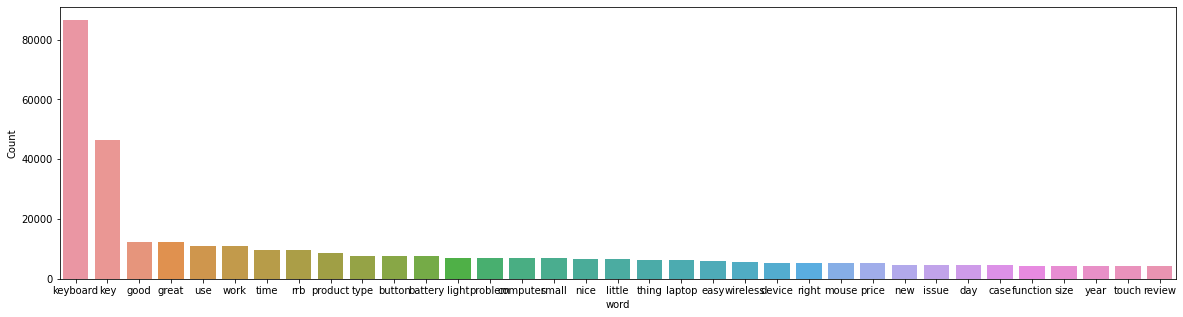

In [100]:
freq_words(keyboards['reviews'], 35)

#### Removing any URLs in the reviews

In [101]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)



# remove all urls from df
import re
import string

keyboards['reviews'] = keyboards['reviews'].apply(lambda x: remove_url(x))

#### Removing html tags from the text

In [102]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)



# remove all html tags from df
keyboards['reviews'] = keyboards['reviews'].apply(lambda x: remove_html(x))

#### Removing emojis and emoticons

In [103]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



# remove all emojis from df
keyboards['reviews'] = keyboards['reviews'].apply(lambda x: remove_emoji(x))

In [104]:
!pip3 install emot
import emot
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

# Function for removing emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
    return emoticon_pattern.sub(r'', text)



# keyboards['reviews'] = keyboards['reviews'].apply(lambda x: remove_emoticons(x))

<>:7: DeprecationWarning: invalid escape sequence \(
<>:7: DeprecationWarning: invalid escape sequence \|
<>:7: DeprecationWarning: invalid escape sequence \)
<>:7: DeprecationWarning: invalid escape sequence \(
<>:7: DeprecationWarning: invalid escape sequence \|
<>:7: DeprecationWarning: invalid escape sequence \)
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1804/3800981782.py:7: DeprecationWarning: invalid escape sequence \(
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1804/3800981782.py:7: DeprecationWarning: invalid escape sequence \|
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1804/3800981782.py:7: DeprecationWarning: invalid escape sequence \)
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [105]:
# correction of the words spelling - not done at it is taking  lot of time to run
# from textblob import TextBlob
# keyboards['reviews'].apply(lambda x: str(TextBlob(x).correct()))

         word  count
0    keyboard  86578
29        key  46312
87       good  12289
16      great  12215
19        use  10985
112      work  10963
116      time   9725
25        rrb   9592
248   product   8540
195      type   7770
67     button   7590
360   battery   7555
257     light   7123
95    problem   6987
36   computer   6821
56      small   6796
272      nice   6547
39     little   6471
22      thing   6297
380    laptop   6184
34       easy   5958
126  wireless   5672
372    device   5272
31      right   5206
668     mouse   5159
102     price   5148
193       new   4754
15      issue   4662
110       day   4592
437      case   4477


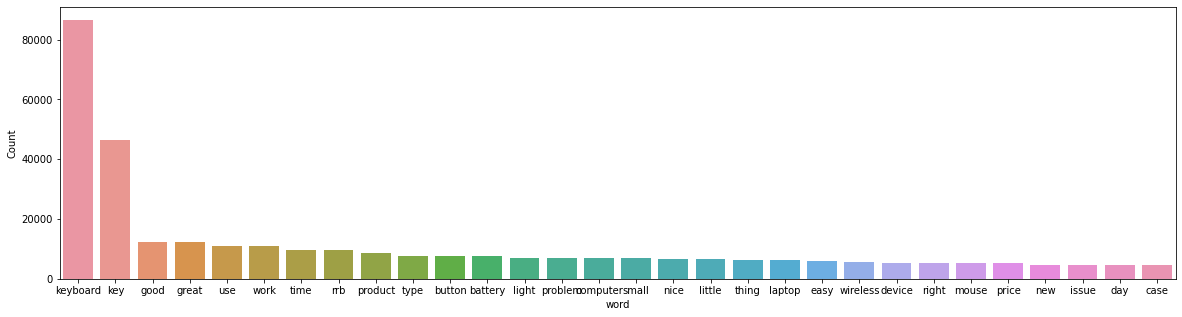

In [106]:
freq_words(keyboards['reviews'])

In [107]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

<>:4: DeprecationWarning: invalid escape sequence \[
<>:6: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \[
<>:6: DeprecationWarning: invalid escape sequence \w
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1804/2170350517.py:4: DeprecationWarning: invalid escape sequence \[
  text = re.sub('\[.*?\]', '', text)
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1804/2170350517.py:6: DeprecationWarning: invalid escape sequence \w
  text = re.sub('\w*\d\w*', '', text)


In [108]:


keyboards['reviews'] = keyboards['reviews'].apply(round1)
keyboards['reviews']



0                                                                                                                keyboard store discoverd ergonomic flat curve middle picture amazon pro curve write sale amazon
1        keyboard random inexpensive due issue great comfort ease use normal learning curve normal keyboard thing reason star rrb reviewer power sleep key upper right corner keyboard power key bad easy bum...
2        old key ergo keyboard belkin keyboard similar licensed key oem stuff great keyboard well natural keyboard home much key snappy arrow key key small layed wrong keyboard well key correct size proper...
3                                                                                                                     keyboard key correct side split touch great response key key combination wasd game problem
4                                                                                                                          black office white home comfortable key p

         word  count
0    keyboard  86578
29        key  46312
87       good  12289
16      great  12215
19        use  10985
112      work  10963
116      time   9725
25        rrb   9592
248   product   8540
195      type   7770
67     button   7590
360   battery   7555
257     light   7123
95    problem   6987
36   computer   6821
56      small   6796
272      nice   6547
39     little   6471
22      thing   6297
380    laptop   6184
34       easy   5958
126  wireless   5672
372    device   5272
31      right   5206
668     mouse   5159
102     price   5148
193       new   4754
15      issue   4662
110       day   4592
437      case   4477


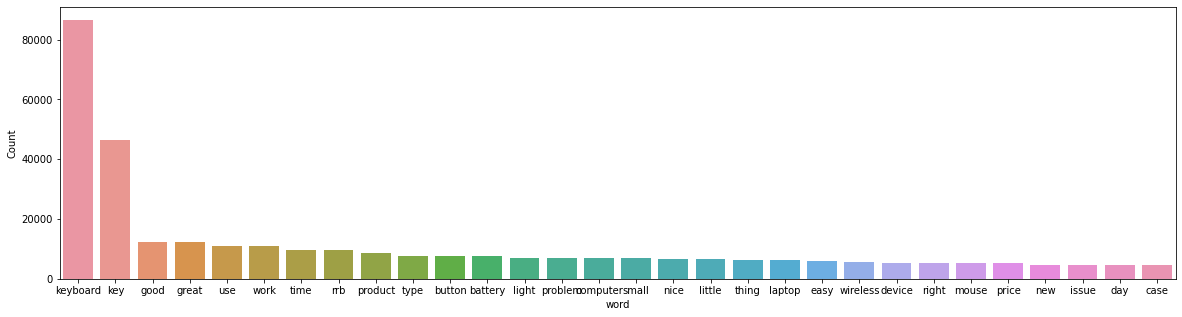

In [109]:
freq_words(keyboards['reviews'])

In [110]:


# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)



In [111]:


keyboards['reviews'] = keyboards['reviews'].apply(round2)
keyboards['reviews']



0                                                                                                                keyboard store discoverd ergonomic flat curve middle picture amazon pro curve write sale amazon
1        keyboard random inexpensive due issue great comfort ease use normal learning curve normal keyboard thing reason star rrb reviewer power sleep key upper right corner keyboard power key bad easy bum...
2        old key ergo keyboard belkin keyboard similar licensed key oem stuff great keyboard well natural keyboard home much key snappy arrow key key small layed wrong keyboard well key correct size proper...
3                                                                                                                     keyboard key correct side split touch great response key key combination wasd game problem
4                                                                                                                          black office white home comfortable key p

In [112]:
keyboards['word_count'] = keyboards['reviews'].apply(lambda x: len(str(x).split(" ")))
keyboards[['reviews','word_count']].head()

,reviews,word_count
0,keyboard store discoverd ergonomic flat curve middle picture amazon pro curve write sale amazon,14
1,keyboard random inexpensive due issue great comfort ease use normal learning curve normal keyboard thing reason star rrb reviewer power sleep key upper right corner keyboard power key bad easy bum...,42
2,old key ergo keyboard belkin keyboard similar licensed key oem stuff great keyboard well natural keyboard home much key snappy arrow key key small layed wrong keyboard well key correct size proper...,103
3,keyboard key correct side split touch great response key key combination wasd game problem,14
4,black office white home comfortable key proper place cheap price worth great keyboard,13


         word  count
0    keyboard  86578
29        key  46312
87       good  12289
16      great  12215
19        use  10985
112      work  10963
116      time   9725
25        rrb   9592
248   product   8540
195      type   7770
67     button   7590
360   battery   7555
257     light   7123
95    problem   6987
36   computer   6821
56      small   6796
272      nice   6547
39     little   6471
22      thing   6297
380    laptop   6184
34       easy   5958
126  wireless   5672
372    device   5272
31      right   5206
668     mouse   5159
102     price   5148
193       new   4754
15      issue   4662
110       day   4592
437      case   4477


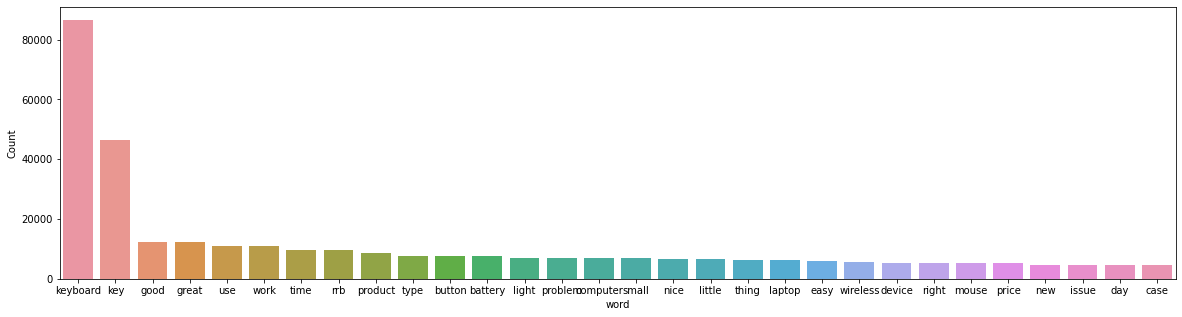

In [113]:
freq_words(keyboards['reviews'])

In [114]:
keyboards.to_csv('keyboards_processed.csv')

In [115]:
keyboards

,Unnamed: 0,product_Id,rating,reviews,stopwords,punctuation,hastags,numerics,upper,word_count
0,0,B00000J1UG-0000,2,keyboard store discoverd ergonomic flat curve middle picture amazon pro curve write sale amazon,33,0,0,0,2,14
1,1,B00000J1UG-0001,3,keyboard random inexpensive due issue great comfort ease use normal learning curve normal keyboard thing reason star rrb reviewer power sleep key upper right corner keyboard power key bad easy bum...,68,0,0,0,14,42
2,2,B00000J1UG-0002,3,old key ergo keyboard belkin keyboard similar licensed key oem stuff great keyboard well natural keyboard home much key snappy arrow key key small layed wrong keyboard well key correct size proper...,203,0,0,0,22,103
3,3,B00000J1UG-0003,4,keyboard key correct side split touch great response key key combination wasd game problem,19,0,0,0,0,14
4,4,B00000J1UG-0004,4,black office white home comfortable key proper place cheap price worth great keyboard,30,0,0,0,2,13
...,...,...,...,...,...,...,...,...,...,...
33608,33608,BT008UKTMW-0004,3,great little device price other market keyboard comfortable level hand wrist tire little flimsy,24,0,0,0,1,14
33609,33609,BT008UKTMW-0005,3,product least part rrb easy install keyboard part mouse shelf plastic sort fragile function heavy handed use keyboard mouse desktop,19,0,0,0,4,20
33610,33610,BT008UKTMW-0006,3,drawer installation template drawer essential rrb mouse platform slide counter entire drawer feature able rrb modification place thin piece sticky side mouse shelf provide nice mouse,39,0,0,0,7,26
33611,33611,BT008UKTMW-0007,4,old oak desk father office new furniture desk fantastic arm high pain arm shoulder space keyboard easy install month sturdy good love,42,0,0,0,6,22


In [116]:
!pip3 install -q wordcloud
import wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [117]:
text_for_cloud = " ".join(word for word in keyboards.reviews)
print ("There are {} words in the combination of all reviews.".format(len(text_for_cloud)))

There are 7746879 words in the combination of all reviews.


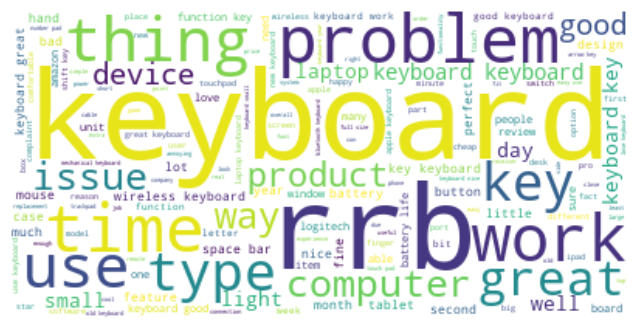

In [118]:
from matplotlib.pyplot import figure

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
figure(figsize= (8,8), dpi= 100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [119]:
freq_of_words = pd.Series(' '.join(keyboards['reviews']).split()).value_counts()[:40]
freq_of_words

keyboard    86578
key         46312
good        12289
great       12215
use         10985
work        10963
time         9725
rrb          9592
product      8540
type         7770
button       7590
battery      7555
light        7123
problem      6987
computer     6821
small        6796
nice         6547
little       6471
thing        6297
laptop       6184
easy         5958
wireless     5672
device       5272
right        5206
mouse        5159
price        5148
new          4754
issue        4662
day          4592
case         4477
function     4408
size         4366
year         4353
touch        4241
review       4239
bit          4022
month        4004
lot          3963
hand         3885
pad          3885
dtype: int64